• DOMAIN:  Semiconductor manufacturing process

• CONTEXT:  A  complex  modern  semiconductor  manufacturing  process  is  normally  under  constant  surveillance  via  the  monitoring  of 
signals/variables  collected  from  sensors  and  or  process  measurement  points.  However,  not  all  of  these  signals  are  equally  valuable  in  a 
specific  monitoring  system.  The  measured  signals  contain  a  combination  of  useful  information,  irrelevant  information  as  well  as  noise. 
Engineers  typically  have  a  much  larger  number  of  signals  than  are  actually  required.  If  we  consider  each  type  of  signal  as  a  feature,  then 
feature  selection  may  be  applied  to  identify  the  most  relevant  signals.  The  Process  Engineers  may  then  use  these  signals  to  determine  key 
factors  contributing  to  yield  excursions  downstream  in  the  process.  This  will  enable  an  increase  in  process  throughput,  decreased  time  to 
learning  and  reduce  the  per  unit  production  costs.  These  signals  can  be  used  as  features  to  predict  the  yield  type.  And  by  analysing  and 
trying out different combinations of features, essential signals that are impacting the yield type can be identified. 

• DATA DESCRIPTION: signal-data.csv : (1567, 592) 
The data consists of 1567 datapoints each with 591 features. 
The  dataset  presented  in  this  case  represents  a  selection  of  such  features  where  each  example  represents  a  single  production  entity  with 
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to 
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
 
• PROJECT  OBJECTIVE:  We  will  build  a  classifier  to  predict  the  Pass/Fail  yield  of  a  particular  process  entity  and  analyse  whether  all  the 
features are required to build the model or not.

Steps and tasks: 

1. Import and understand the data.

A. Import ‘signal-data.csv’ as DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('signal-data.csv')
orig_data = data
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


B. Print 5 point summary and share at least 2 observations.

In [2]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


- Some of the columns do have null values which is evident by seeing the count column

- And there is skewness in many of the columns which we can understand by seeing the mean and 50% percentile

- Since the number of columns is very high, it is difficult to interpret all features

2. Data cleansing:
 
A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [3]:
limit = 0.2 * len(data)

data = data.dropna(thresh=limit, axis=1)

for column in data.columns:
    if data[column].isnull().sum() > 0:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)


In [4]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=584)

In [5]:
data.shape

(1567, 584)

B. Identify and drop the features which are having same value for all the rows.

In [6]:
cols_to_drop = [col for col in data.columns if data[col].nunique() == 1]
print(len(cols_to_drop))
data.drop(columns=cols_to_drop, inplace=True)


116


In [7]:
data.shape

(1567, 468)

C. Drop other features if required using relevant functional knowledge. Clearly justify the same. 

Column 67 has high standard deviation and column 23 and 24 contains extreme negative and postive values. So we will remove the three columns

In [8]:
data = data.drop(columns=['67', '23', '24'])
data.shape

(1567, 465)

D. Check for multi-collinearity in the data and take necessary action.

In [9]:
data['Time'] = pd.to_datetime(data['Time'])

In [10]:
corr_matrix = data.corr().abs()

high_corr_threshold = 0.7
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper.columns if any(upper[col] > high_corr_threshold)]

cols_to_drop = high_corr_cols
cleaned_data = data.drop(columns=cols_to_drop)
print("Original :", data.shape)
print("After Cleaned :", cleaned_data.shape)
data = cleaned_data

Original : (1567, 465)
After Cleaned : (1567, 210)


We have removed many columns which have high colimearity in the above code

E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

- We have removed some columns based on the fluctuation in values

- Some columns have been removed based on the extreme colinearity

- And some columns have been removed considering the lack of values in it

- Some columns have been removed due to high standard deviation

3. Data analysis & visualisation:

A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

In [11]:
%matplotlib inline

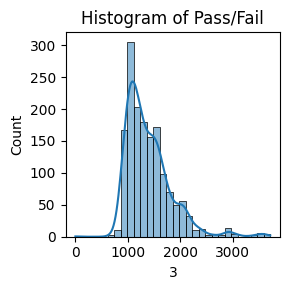

In [12]:
plt.figure(figsize=(3, 3))
sns.histplot(data['3'], kde=True, bins=30)
plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

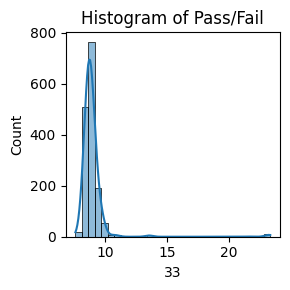

In [13]:
plt.figure(figsize=(3, 3))
sns.histplot(data['33'], kde=True, bins=30)
plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

In [14]:
# import sweetviz as sv

# report = sv.analyze(data, pairwise_analysis='off')
# report.show_html('sweetviz_report.html')


B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

<Axes: xlabel='2', ylabel='3'>

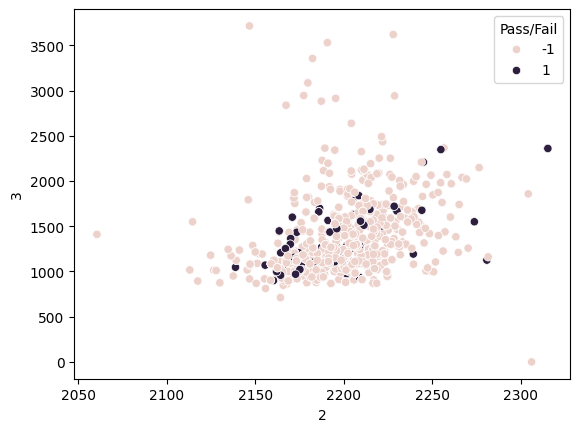

In [15]:
sns.scatterplot(x='2', y='3', data=data, hue='Pass/Fail')

There is no enough details that can be got from bivarirate analaysis with these much of columns and also when we dont have any information on what sensor data eachh column belongs to

<Axes: xlabel='2', ylabel='3'>

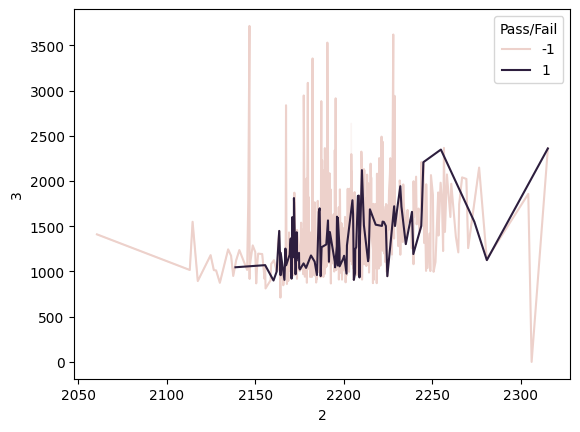

In [16]:
sns.lineplot(x='2', y='3', hue='Pass/Fail', data=data)


Since we dont have the column name here properly. It is difficult to choose a particular column.

4. Data pre-processing:

A. Segregate predictors vs target attributes.

In [17]:
X = data.drop(columns=['Pass/Fail', 'Time'])
y = data['Pass/Fail']
X.head()

,0,1,2,3,4,6,7,8,9,10,...,571,572,578,579,581,582,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,2.1113,8.95,0.021615,0.016829,97.934373,0.5005,0.0118,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,2.4335,5.92,0.009600,0.020100,208.204500,0.5019,0.0223,0.009600,0.020100,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0293,11.21,0.058400,0.048400,82.860200,0.4958,0.0157,0.058400,0.048400,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,2.0253,9.33,0.020200,0.014900,73.843200,0.4990,0.0103,0.020200,0.014900,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,2.0275,8.83,0.021615,0.016829,97.934373,0.4800,0.4766,0.020200,0.014900,73.843200


B. Check for target balancing and fix it if found imbalanced. 

In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print(f'Original class distribution: {Counter(y)}')

rOs = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = rOs.fit_resample(X, y)

upsampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Pass/Fail'])], axis=1)

print(f'Resampled class distribution: {Counter(y_resampled)}')


Original class distribution: Counter({-1: 1463, 1: 104})
Resampled class distribution: Counter({-1: 1463, 1: 1463})


We have fixed the imbalance using imblearn, initially there were {-1: 1463, 1: 104}. After the upsampling, the data is balanced {-1: 1463, 1: 1463}

In [19]:
# from sklearn.utils import resample

# class_distribution = data['Pass/Fail'].value_counts()
# print(class_distribution)


# if len(class_distribution) > 1:
#     minority_class = class_distribution.idxmin()
#     majority_class = class_distribution.idxmax()

#     minority_data = data[data['Pass/Fail'] == minority_class]
#     majority_data = data[data['Pass/Fail'] == majority_class]

#     minority_upsampled = resample(minority_data, replace=True, n_samples=len(majority_data))

#     upsampled_data = pd.concat([majority_data, minority_upsampled])

#     print(upsampled_data['Pass/Fail'].value_counts())

C. Perform train-test split and standardise the data or vice versa if required.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(upsampled_data.drop(columns=['Pass/Fail']), upsampled_data['Pass/Fail'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train_std shape:", X_train_std.shape)
print("X_test_std shape:", X_test_std.shape)


X_train shape: (2340, 208)
X_test shape: (586, 208)
y_train shape: (2340,)
y_test shape: (586,)
X_train_std shape: (2340, 208)
X_test_std shape: (586, 208)


D. Check if the train and test data have similar statistical characteristics when compared with original data. 

In [21]:
X_train.describe()

,0,1,2,3,4,6,7,8,9,10,...,571,572,578,579,581,582,583,586,587,589
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,...,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,3011.109849,2497.669634,2199.805968,1366.068927,2.754931,101.375810,0.122017,1.466969,-0.001788,0.000506,...,2.094947,22.987469,0.021616,0.017220,97.319503,0.500459,0.015797,0.021463,0.017184,100.383597
std,81.592399,74.679351,31.152774,401.357021,39.786874,5.658832,0.006966,0.067194,0.014254,0.009493,...,0.315606,72.496827,0.007354,0.006430,47.682944,0.003717,0.014861,0.012113,0.008894,86.760589
min,2743.240000,2158.750000,2060.660000,711.025800,0.681500,82.131100,0.000000,1.191000,-0.047200,-0.032900,...,0.980200,3.540000,-0.016900,0.003200,0.000000,0.477800,0.006000,-0.016900,0.003200,0.000000
25%,2954.420000,2458.150000,2176.758350,1065.854250,1.020400,98.805600,0.121100,1.422800,-0.010500,-0.005500,...,1.980900,7.457500,0.021615,0.016829,85.312200,0.498100,0.011500,0.014000,0.010800,45.426400
50%,3000.385000,2499.720000,2197.677800,1269.607800,1.310100,101.666700,0.122300,1.467900,-0.001600,0.001200,...,2.142900,8.650000,0.021615,0.016829,97.934373,0.500600,0.013800,0.020400,0.015900,76.458400
75%,3054.817500,2536.480000,2217.094425,1564.602300,1.513800,104.360000,0.123800,1.513450,0.006325,0.006500,...,2.300200,10.150000,0.021615,0.016829,97.934373,0.502700,0.016900,0.027900,0.021500,118.228900
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.653900,0.060900,0.053000,...,2.739500,454.560000,0.102800,0.079900,737.304800,0.509800,0.476600,0.102800,0.079900,737.304800


In [22]:
X_test.describe()

,0,1,2,3,4,6,7,8,9,10,...,571,572,578,579,581,582,583,586,587,589
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,3006.828584,2493.488381,2198.933559,1377.831276,3.206960,100.993784,0.122266,1.468024,-0.002519,0.000831,...,2.076484,25.275288,0.022149,0.017263,97.884684,0.500297,0.014760,0.021301,0.017369,106.364573
std,79.708063,77.773786,28.097770,381.587913,45.902949,5.444314,0.005377,0.067629,0.015558,0.009806,...,0.339270,77.487893,0.007486,0.006636,56.384442,0.003536,0.005339,0.011617,0.008974,97.454774
min,2787.490000,2254.990000,2124.844400,0.000000,0.681500,82.246700,0.000000,1.200500,-0.053400,-0.034900,...,0.984700,4.840000,-0.006000,0.004200,0.000000,0.490200,0.007100,-0.006000,0.004200,0.000000
25%,2958.052500,2449.250000,2177.322200,1089.365500,1.043625,98.215025,0.121200,1.425325,-0.012075,-0.005500,...,1.973600,7.230000,0.021615,0.016807,78.181475,0.498100,0.011500,0.013700,0.011200,47.072975
50%,2996.020000,2499.195000,2196.744450,1298.820700,1.310100,101.147800,0.122300,1.467950,-0.002500,0.001200,...,2.135450,8.670000,0.021615,0.016829,97.934373,0.500500,0.013800,0.020700,0.015900,75.507700
75%,3045.710000,2536.480000,2217.411100,1567.936350,1.512825,104.085600,0.123800,1.514775,0.007000,0.006700,...,2.311200,10.157500,0.021615,0.016829,97.934373,0.502500,0.016175,0.027800,0.021300,129.912575
max,3339.930000,2839.460000,2315.266700,3085.378100,1112.472800,123.424400,0.127600,1.656400,0.074900,0.030600,...,2.675600,452.540000,0.058400,0.070100,579.181700,0.508800,0.046000,0.058400,0.070100,579.181700


In [23]:
orig_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


The 5 point summary of the train, test and original data seem to be almost same.

5. Model training, testing and tuning:

A. Use any Supervised Learning technique to train a model.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8993174061433447
Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.82      0.90       306
           1       0.84      0.98      0.90       280

    accuracy                           0.90       586
   macro avg       0.91      0.90      0.90       586
weighted avg       0.91      0.90      0.90       586



B. Use cross validation techniques.

In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = LogisticRegression(max_iter=1000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_scores = cross_val_score(model, X_train_std, y_train, cv=cv, scoring='accuracy')

model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Accuracy on Test Data:", accuracy)
print("Classification Report:\n", report)


Cross-Validation Scores: [0.93162393 0.88675214 0.89957265 0.9017094  0.91025641]
Mean CV Accuracy: 0.905982905982906
Accuracy on Test Data: 0.8993174061433447
Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.82      0.90       306
           1       0.84      0.98      0.90       280

    accuracy                           0.90       586
   macro avg       0.91      0.90      0.90       586
weighted avg       0.91      0.90      0.90       586



The model's accuracy on test data is around 90% which is a good score

C. Apply hyper-parameter tuning techniques to get the best accuracy.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Accuracy: 0.9188034188034188
Test Accuracy: 0.9010238907849829


D. Use any other technique/method which can enhance the model performance.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

sc = StandardScaler()
sc_data = sc.fit_transform(upsampled_data.drop(columns=['Pass/Fail']))

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(sc_data)

pca_data = pd.DataFrame(principal_components)
X_train, X_test, y_train, y_test = train_test_split(pca_data, upsampled_data['Pass/Fail'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression(max_iter=1000))
])

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Accuracy: 0.8696581196581196
Test Accuracy: 0.8805460750853242


We have done PCA and reduced dimesions and trained the model and produced a model which has approximate accuracy as previous model.

E. Display and explain the classification report in detail.

In [28]:
y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.80      0.88       306
           1       0.82      0.97      0.89       280

    accuracy                           0.88       586
   macro avg       0.89      0.88      0.88       586
weighted avg       0.89      0.88      0.88       586



- For label 1, a recall of 0.97 indicates that the model correctly identified 97% of actual 1 instances

- A precision of 0.82 for label 1 means that out of all instances predicted as 1, 82% were actually 1

- In this case, the F1-score for label -1 is 0.88, and for label 1, it is 0.89, showing a good balance between precision and recall for both classes.

F. Apply the above steps for all possible models that you have learnt so far.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

sc = StandardScaler()
sc_data = sc.fit_transform(upsampled_data.drop(columns=['Pass/Fail']))

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(sc_data)

pca_data = pd.DataFrame(principal_components)
X_train, X_test, y_train, y_test = train_test_split(pca_data, upsampled_data['Pass/Fail'], test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [10, 20],
    'classifier__max_depth': [None, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 20}
Best Accuracy: 0.9995726495726496
Test Accuracy: 0.9982935153583617


The above model is trained with randomclassifier but the estimators and cv are kept low as the process was taking too much time. So the accuracy of 99% is very much understandable but we cant consider this as our best model.

In [30]:
from sklearn.svm import SVC

sc = StandardScaler()
sc_data = sc.fit_transform(upsampled_data.drop(columns=['Pass/Fail']))

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(sc_data)

pca_data = pd.DataFrame(principal_components)
X_train, X_test, y_train, y_test = train_test_split(pca_data, upsampled_data['Pass/Fail'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', SVC())
])

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear','sigmoid'],
    'classifier__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best Accuracy: 0.8884615384615384
Test Accuracy: 0.89419795221843
Classification Report:
              precision    recall  f1-score   support

          -1       0.98      0.81      0.89       306
           1       0.83      0.99      0.90       280

    accuracy                           0.89       586
   macro avg       0.91      0.90      0.89       586
weighted avg       0.91      0.89      0.89       586



6. Post Training and Conclusion:

A. Display and compare all the models designed with their train and test accuracies.

In [31]:
svc_acc = 0.8884615384615384
log_acc = 0.8696581196581196

diff = svc_acc - log_acc
print(f'The best model is {diff}% more accurate than the others')

The best model is 0.018803418803418848% more accurate than the others


B. Select the final best trained model along with your detailed comments for selecting this model. 

The best model that gave more accuracy among others is SVC. It gave 

Best Accuracy: 0.8884615384615384
Test Accuracy: 0.89419795221843

And allso the f1-score was around ~90% in both the Pass and fail identification.
 

C. Pickle the selected model for future use.

In [32]:
import pickle
with open('mySvmModel.pkl', 'wb') as m_file:
    pickle.dump(best_model, m_file)

The above code pickles best model in svm.

D. Write your conclusion on the results.

We have trained series of models in this project notebook, and we have identified svc as the best model as it has given us 90% accuracy in unknown data. The model has also been pickled in mySvmModel.pkl inorder to use it in future when we need to use for other unknown data. This model will help us to identify the Pass/Fail of the semiconductor manufactuing process. We have also trained this model by dropping and also applyying several featurisation and model tuning techniques.